In [31]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score

In [2]:
# Import dataset
AS = pd.read_csv("E:/1. University Teaching Data/9. PU-CSAS/2. Python Programming for Data Analysis/10. Linear and Multiple Regression/Album Sales 2.csv")
AS

,adverts,sales,airplay,attract
0,10.256,330,43,10
1,985.685,120,28,7
2,1445.563,360,35,7
3,1188.193,270,33,7
4,574.513,220,44,5
...,...,...,...,...
195,910.851,190,26,7
196,888.569,240,14,6
197,800.615,250,34,6
198,1500.000,230,11,8


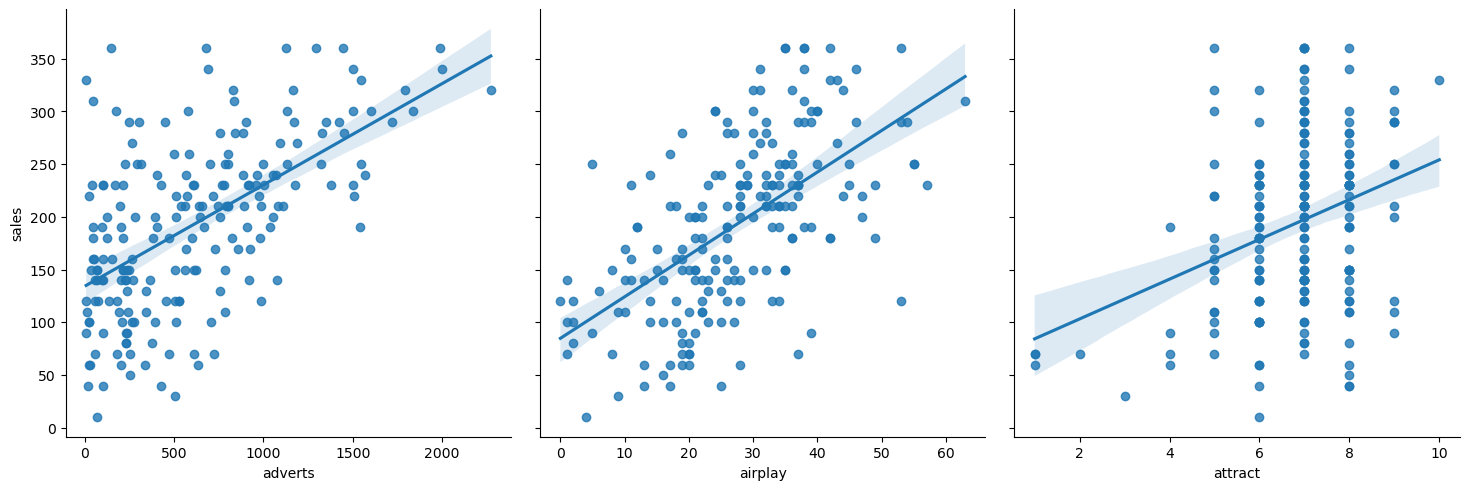

In [8]:
# Ploting (Check the relationship between dependent variable and independent variables)
g = sns.PairGrid(AS, y_vars=["sales"], x_vars=['adverts','airplay','attract'],height = 5)
g.map(sns.regplot)
plt.show()

In [11]:
# Slice the Data (Dependent & Independent Data)
x = AS[['adverts','airplay','attract']]
y = AS['sales']

In [18]:
# Splitting the variables as Training and Test
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.9,test_size=0.1)

##### Build a simple Linear Regression Model
        - statsmodel
        - sklearn

##### statsmodel 

- Linear Regression Model without intercept 

In [20]:
# Model fitting
lr = sm.OLS(y_train,x_train).fit()

# Print the Linear Regression Summary
print(lr.summary())

                                 OLS Regression Results                                
Dep. Variable:                  sales   R-squared (uncentered):                   0.951
Model:                            OLS   Adj. R-squared (uncentered):              0.950
Method:                 Least Squares   F-statistic:                              1136.
Date:                Wed, 17 Jan 2024   Prob (F-statistic):                   2.40e-115
Time:                        11:27:35   Log-Likelihood:                         -947.42
No. Observations:                 180   AIC:                                      1901.
Df Residuals:                     177   BIC:                                      1910.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

- Linear Regression Model with intercept 

In [21]:
# Adding a constant to get an intercept 
x_train_sm = sm.add_constant(x_train)

# Model fitting
lr = sm.OLS(y_train,x_train_sm).fit()

# Print the Linear Regression Summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     116.5
Date:                Wed, 17 Jan 2024   Prob (F-statistic):           1.37e-41
Time:                        11:27:38   Log-Likelihood:                -946.05
No. Observations:                 180   AIC:                             1900.
Df Residuals:                     176   BIC:                             1913.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -29.7643     18.085     -1.646      0.1

- Prediction 

In [22]:
# Adding a constant to get an intercept 
x_test_sm = sm.add_constant(x_test)

# Prediction of y 'sales' corresponding to x_test_sm
sales_pred = lr.predict(x_test_sm)

# Print the Linear Regression Summary
print(sales_pred)

117    148.699105
83     174.799077
156    243.715483
28     188.337360
65     140.913480
12     167.667464
16     255.493281
123    285.187077
26     112.485490
110    179.118181
68     141.961973
114    193.700867
67     181.532825
101    313.568405
50     226.324345
132    202.466357
3      262.397949
96      96.607873
145    177.526102
136    108.426312
dtype: float64


##### Accuracy Metrics
        - Mean Squared Error
        - R^2

In [34]:
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, sales_pred))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, sales_pred))

0.645849463744562

##### sklearn

In [29]:
# Creating and Fitting the Model
model=LinearRegression().fit(AS[['adverts','airplay','attract']],AS['sales'])
model

LinearRegression()

In [30]:
# Parameters of the Regression Model Coefficients
print("Intercept value = ", model.intercept_)
print("Regression Coefficients = ", model.coef_)

Intercept value =  -26.612958361679375
Regression Coefficients =  [ 0.08488483  3.36742517 11.0863352 ]
